国产电影质量与上映时间分析
=======
崔江旗 201706062308

# 目标

利用从豆瓣获取的 10 多年的国产电影评分数据分析国产电影质量与上映时间的关系。

# Modules Used
json, requests, re, matplotlib, datetime, numpy

In [2]:
import json, requests, re
from datetime import datetime as dt
import matplotlib.pyplot as plt
import numpy as np

# Data Collection

In [ ]:
films = []
with open('films.json', 'w') as f:
    for i in range(0, 4540, 20):
        response = requests.get(
            'https://movie.douban.com/j/new_search_subjects\
            ?sort=R&range=0,10&tags=%E7%94%B5%E5%BD%B1,%E5%A4%A7%E9%99%86\
            &start={}'.format(i))
        json_data = response.json()['data']
        films.append(json_data)
    json.dump(films, f)

上述代码会 get 227 个链接，获得相应的 json 数据，每个 json 数据包含 20 条电影信息。

每条信息如下所示：

In [ ]:
{'casts': ['**',],
 'cover': 'https://img3.doubanio.com/view/photo/s_ratio_poster/public/p2506728456.jpg',
 'cover_x': 4060,
 'cover_y': 5760,
 'directors': ['***'],
 'id': '27133038',
 'rate': '5.1',
 'star': '25',
 'title': '****',
 'url': 'https://movie.douban.com/subject/27133038/'}

利用 requests, re 库抓取每个电影的具体上映日期。

In [ ]:
f = open('films.json', 'r+'):
films = json.load(f)

for film in films:
    url = film['url']
    response = requests.get(url)
    if response.status_code != 404:
        content = response.text
        result = re.search(r'(?<=<span property="v:initialReleaseDate" content=")\d+-\d+-\d+', content)
        if result != None:
            date = result.group()
            film.update({'date': date})
        result = re.search(r'(?<=<span property="v:initialReleaseDate" content=")\d+', content)
        if result != None:
            year = result.group()
        else:
            year = re.search(r'(?<=<span class="year">\()\d+', content).group()
        film.update({'year': year})

json.dump(films, f)
f.close()

# Data Manipulation

排除与目标无关的数据。

In [6]:
f = open('films.json'):
films = json.load(f)
    
for i in range(len(films)):
    del films[i]['casts']
    del films[i]['cover']
    del films[i]['cover_x']
    del films[i]['cover_y']
    del films[i]['directors']
    del films[i]['id']
    del films[i]['star']
    del films[i]['title']
    
json.dump(films, f)
f.close()

删除 10 年前信息和无用信息。

In [3]:
f = open('films.json', 'r+')
films_raw = json.load(f)
films = []

for film in films_raw:
    if 'rate' in film:
        if film['rate'] != '':
            films.append(film)

films_with_date = []
films_with_year = []

for film in films:
    if 'date' in film:
        date = dt.strptime(film['date'], '%Y-%m-%d')
        if date >= dt(2008, 1, 1):
            film['date'] = date
            films_with_date.append(film)

for film in films:
    if 'year' in film:
        year = dt.strptime(film['year'], '%Y')
        if year >= dt(2008, 1, 1):
            film['year'] = year
            films_with_year.append(film)
            
list_of_date = []
values = []
for film in films_with_date:
    list_of_date.append(film['date'])
    values.append(float(film['rate']))
    
f.close()

# 散点图

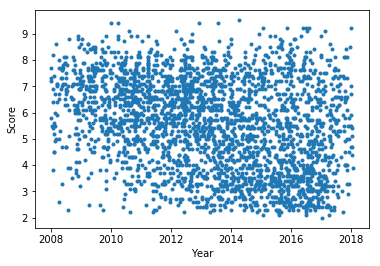

In [4]:
plt.scatter(list_of_date, values, marker='.')
plt.ylabel('Score')
plt.xlabel('Year')

plt.show()

# 平均分折线图

In [4]:
score_sum = np.zeros(11)
count = np.zeros(11)

for film in films_with_year:
    if (dt(2008, 1, 1) <= film['year'] < dt(2009, 1, 1)):
        score_sum[0] += float(film['rate'])
        count[0] += 1
    elif (dt(2009, 1, 1) <= film['year'] < dt(2010, 1, 1)):
        score_sum[1] += float(film['rate'])
        count[1] += 1
    elif (dt(2010, 1, 1) <= film['year'] < dt(2011, 1, 1)):
        score_sum[2] += float(film['rate'])
        count[2] += 1
    elif (dt(2011, 1, 1) <= film['year'] < dt(2012, 1, 1)):
        score_sum[3] += float(film['rate'])
        count[3] += 1
    elif (dt(2012, 1, 1) <= film['year'] < dt(2013, 1, 1)):
        score_sum[4] += float(film['rate'])
        count[4] += 1
    elif (dt(2013, 1, 1) <= film['year'] < dt(2014, 1, 1)):
        score_sum[5] += float(film['rate'])
        count[5] += 1
    elif (dt(2014, 1, 1) <= film['year'] < dt(2015, 1, 1)):
        score_sum[6] += float(film['rate'])
        count[6] += 1
    elif (dt(2015, 1, 1) <= film['year'] < dt(2016, 1, 1)):
        score_sum[7] += float(film['rate'])
        count[7] += 1
    elif (dt(2016, 1, 1) <= film['year'] < dt(2017, 1, 1)):
        score_sum[8] += float(film['rate'])
        count[8] += 1
    elif (dt(2017, 1, 1) <= film['year'] < dt(2018, 1, 1)):
        score_sum[9] += float(film['rate'])
        count[9] += 1
    elif (dt(2018, 1, 1) <= film['year'] < dt(2019, 1, 1)):
        score_sum[10] += float(film['rate'])
        count[10] += 1

score_average = score_sum / count
years = [x for x in range(2008, 2019)]

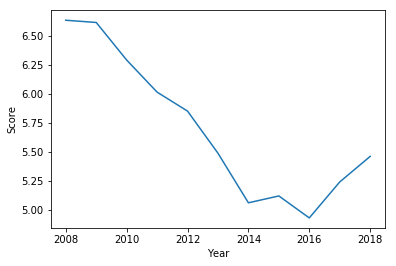

In [5]:
plt.plot(years, score_average)
plt.xlabel('Year'.format(int(count[-1])))
plt.ylabel('Score')
plt.show()

# 结论

从 2008 年到 2018 年，国产电影的质量与发布时间没有明显的线性关系；国产电影低质量作品数量增加，且占比增加，而高质量作品数量与占比显著下降。

同目录下的 films.json 为“利用 requests, re 库抓取每个电影的具体上映日期”后的数据文件，即已经无需爬虫处理的数据。